<a href="https://colab.research.google.com/github/NithyaDugyala/Projects/blob/main/Depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
# Load the dataset
file_path = "/content/FullData (1).csv"
df = pd.read_csv(file_path)
df.head()

,SEQN,depression,gender,age,race,citizenship,education_level,marital_status,household_size,pregnant,...,Rx_INSULIN REGULAR,Rx_days_INSULIN REGULAR,Rx_MEMANTINE,Rx_days_MEMANTINE,Rx_DIPHENHYDRAMINE,Rx_days_DIPHENHYDRAMINE,Rx_MINOCYCLINE,Rx_days_MINOCYCLINE,Rx_METHOCARBAMOL,Rx_days_METHOCARBAMOL
0,31131,Not Depressed,1,44,Black,Citizen,4,Married,4,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31132,Not Depressed,0,70,White,Citizen,5,Married,2,Missing,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31134,Not Depressed,0,73,White,Citizen,3,Married,2,Missing,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31139,Not Depressed,1,18,Other Hispanic,Citizen,0,Never Married,3,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31143,Not Depressed,0,19,White,Citizen,0,Never Married,3,Missing,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Drop non-essential columns (like ID columns)
df.drop(columns=['SEQN'], inplace=True)
df.head()

,depression,gender,age,race,citizenship,education_level,marital_status,household_size,pregnant,birth_place,...,Rx_INSULIN REGULAR,Rx_days_INSULIN REGULAR,Rx_MEMANTINE,Rx_days_MEMANTINE,Rx_DIPHENHYDRAMINE,Rx_days_DIPHENHYDRAMINE,Rx_MINOCYCLINE,Rx_days_MINOCYCLINE,Rx_METHOCARBAMOL,Rx_days_METHOCARBAMOL
0,Not Depressed,1,44,Black,Citizen,4,Married,4,No,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Not Depressed,0,70,White,Citizen,5,Married,2,Missing,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Not Depressed,0,73,White,Citizen,3,Married,2,Missing,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Not Depressed,1,18,Other Hispanic,Citizen,0,Never Married,3,No,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Not Depressed,0,19,White,Citizen,0,Never Married,3,Missing,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Encode categorical target variable
df['depression'] = df['depression'].map({'Not Depressed': 0, 'Depressed': 1})
df.head()

,depression,gender,age,race,citizenship,education_level,marital_status,household_size,pregnant,birth_place,...,Rx_INSULIN REGULAR,Rx_days_INSULIN REGULAR,Rx_MEMANTINE,Rx_days_MEMANTINE,Rx_DIPHENHYDRAMINE,Rx_days_DIPHENHYDRAMINE,Rx_MINOCYCLINE,Rx_days_MINOCYCLINE,Rx_METHOCARBAMOL,Rx_days_METHOCARBAMOL
0,0,1,44,Black,Citizen,4,Married,4,No,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,70,White,Citizen,5,Married,2,Missing,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,73,White,Citizen,3,Married,2,Missing,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,18,Other Hispanic,Citizen,0,Never Married,3,No,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,19,White,Citizen,0,Never Married,3,Missing,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Encode categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: LabelEncoder().fit_transform(x))
df.head()

,depression,gender,age,race,citizenship,education_level,marital_status,household_size,pregnant,birth_place,...,Rx_INSULIN REGULAR,Rx_days_INSULIN REGULAR,Rx_MEMANTINE,Rx_days_MEMANTINE,Rx_DIPHENHYDRAMINE,Rx_days_DIPHENHYDRAMINE,Rx_MINOCYCLINE,Rx_days_MINOCYCLINE,Rx_METHOCARBAMOL,Rx_days_METHOCARBAMOL
0,0,1,44,0,0,4,1,4,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,70,4,0,5,1,2,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,73,4,0,3,1,2,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,18,2,0,0,3,3,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,19,4,0,0,3,3,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Handle missing values (fill with median)
df.fillna(df.median(), inplace=True)
df.head()

,depression,gender,age,race,citizenship,education_level,marital_status,household_size,pregnant,birth_place,...,Rx_INSULIN REGULAR,Rx_days_INSULIN REGULAR,Rx_MEMANTINE,Rx_days_MEMANTINE,Rx_DIPHENHYDRAMINE,Rx_days_DIPHENHYDRAMINE,Rx_MINOCYCLINE,Rx_days_MINOCYCLINE,Rx_METHOCARBAMOL,Rx_days_METHOCARBAMOL
0,0,1,44,0,0,4,1,4,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,70,4,0,5,1,2,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,73,4,0,3,1,2,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,18,2,0,0,3,3,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,19,4,0,0,3,3,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Split dataset into features (X) and target (y)
X = df.drop(columns=['depression'])
y = df['depression']

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)
df.head()

,depression,gender,age,race,citizenship,education_level,marital_status,household_size,pregnant,birth_place,...,Rx_INSULIN REGULAR,Rx_days_INSULIN REGULAR,Rx_MEMANTINE,Rx_days_MEMANTINE,Rx_DIPHENHYDRAMINE,Rx_days_DIPHENHYDRAMINE,Rx_MINOCYCLINE,Rx_days_MINOCYCLINE,Rx_METHOCARBAMOL,Rx_days_METHOCARBAMOL
0,0,1,44,0,0,4,1,4,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,70,4,0,5,1,2,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,73,4,0,3,1,2,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,18,2,0,0,3,3,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,19,4,0,0,3,3,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Function to evaluate and visualize model performance
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"{model_name} Evaluation:")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-"*50)

    # Confusion Matrix Visualization
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Depressed', 'Depressed'], yticklabels=['Not Depressed', 'Depressed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    return acc, prec, rec, f1


In [ ]:
# Models and their performances
model_performance = {}

Logistic Regression Evaluation:
Accuracy: 0.9222497932175352
Precision: 0.3953488372093023
Recall: 0.2
F1 Score: 0.265625
Confusion Matrix:
 [[1098   26]
 [  68   17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1124
           1       0.40      0.20      0.27        85

    accuracy                           0.92      1209
   macro avg       0.67      0.59      0.61      1209
weighted avg       0.90      0.92      0.91      1209

--------------------------------------------------


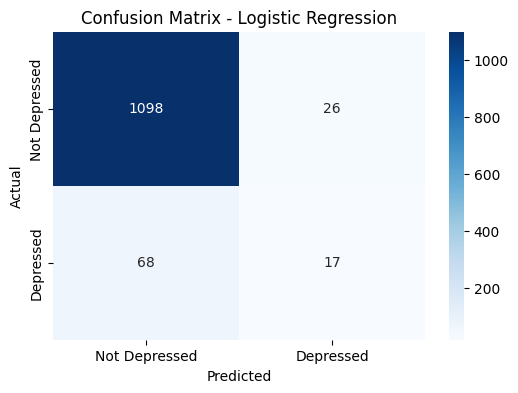

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
model_performance["Logistic Regression"] = evaluate_model(log_reg, X_test, y_test, "Logistic Regression")

Decision Tree Evaluation:
Accuracy: 0.9032258064516129
Precision: 0.28378378378378377
Recall: 0.24705882352941178
F1 Score: 0.2641509433962264
Confusion Matrix:
 [[1071   53]
 [  64   21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1124
           1       0.28      0.25      0.26        85

    accuracy                           0.90      1209
   macro avg       0.61      0.60      0.61      1209
weighted avg       0.90      0.90      0.90      1209

--------------------------------------------------


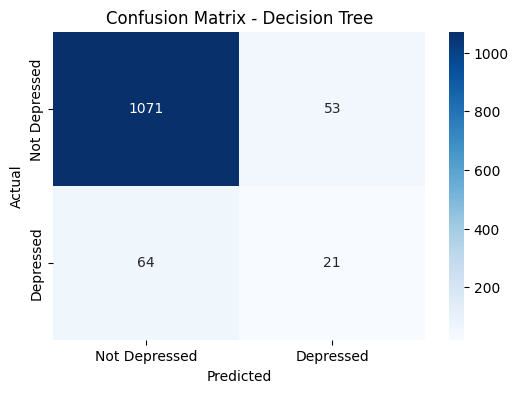

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
model_performance["Decision Tree"] = evaluate_model(decision_tree, X_test, y_test, "Decision Tree")

Random Forest Evaluation:
Accuracy: 0.9296939619520265
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[1124    0]
 [  85    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1124
           1       0.00      0.00      0.00        85

    accuracy                           0.93      1209
   macro avg       0.46      0.50      0.48      1209
weighted avg       0.86      0.93      0.90      1209

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

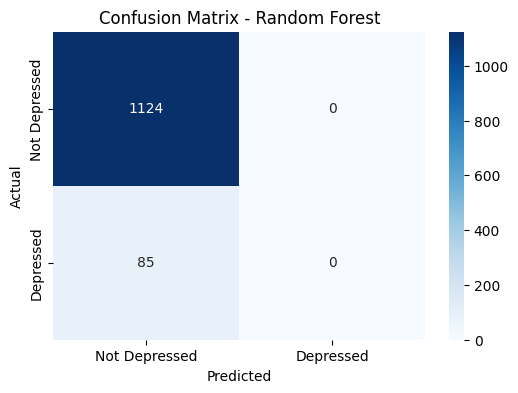

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
model_performance["Random Forest"] = evaluate_model(random_forest, X_test, y_test, "Random Forest")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

SVM Evaluation:
Accuracy: 0.9296939619520265
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[1124    0]
 [  85    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1124
           1       0.00      0.00      0.00        85

    accuracy                           0.93      1209
   macro avg       0.46      0.50      0.48      1209
weighted avg       0.86      0.93      0.90      1209

--------------------------------------------------


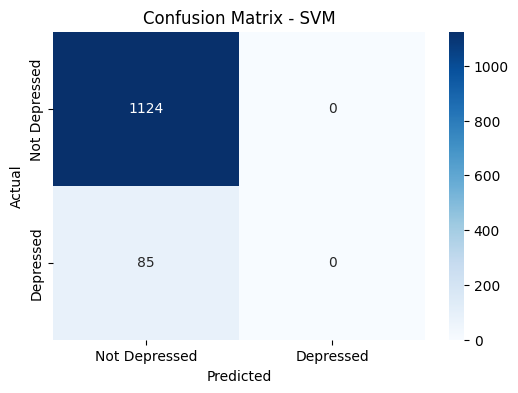

In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
model_performance["SVM"] = evaluate_model(svm_model, X_test, y_test, "SVM")


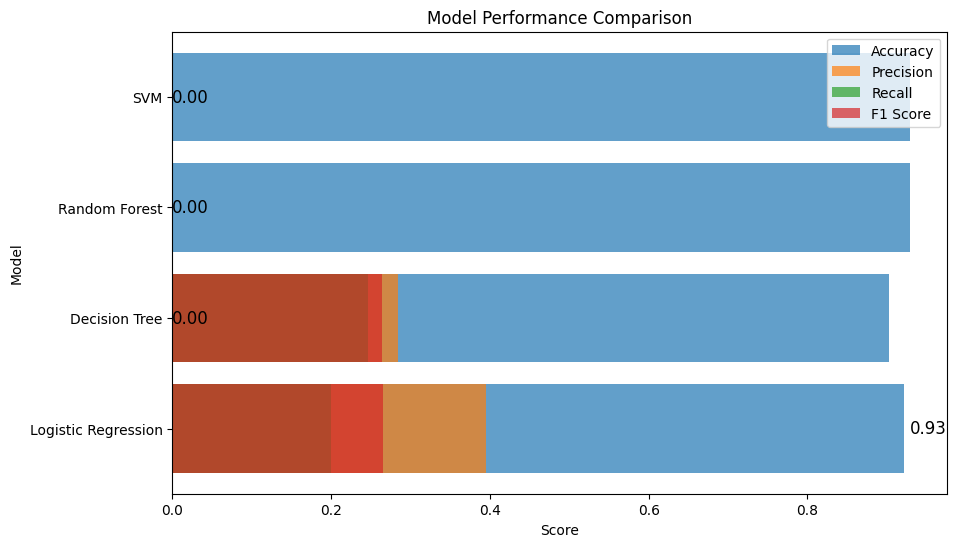

In [ ]:
# Performance Comparison Plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(10,6))
for i, metric in enumerate(metrics):
    values = [model_performance[m][i] for m in model_performance]
    plt.barh([m for m in model_performance], values, alpha=0.7, label=metric)
    plt.text(values[-1], i, f'{values[-1]:.2f}', va='center', fontsize=12)
plt.xlabel("Score")
plt.ylabel("Model")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()
